<a href="https://www.kaggle.com/code/jakubwalczykowski/house-prices-in-poland-eda-prediction?scriptVersionId=122502767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import io
import warnings

import plotly.express as px

## Description
This dataset contains property data from three biggest polish cities. We have given the coordinates so we will be able to find specific properties on the map. In addition, we have square meters, floor, number of rooms, approximate addresses, age of the building and ID number. Let's explore the data and try to make some predictions.

In [2]:
df = pd.read_csv('../input/house-prices-in-poland/Houses.csv', encoding='latin-1')
df.head()

Unnamed: 0                                            address      city  \
0           0           Podgórze Zab³ocie Stanis³awa Klimeckiego    Kraków   
1           1                          Praga-Po³udnie Grochowska  Warszawa   
2           2                            Krowodrza Czarnowiejska    Kraków   
3           3                                           Grunwald    Poznañ   
4           4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa   

   floor       id   latitude  longitude      price  rooms      sq    year  
0    2.0  23918.0  50.049224  19.970379   749000.0    3.0   74.05  2021.0  
1    3.0  17828.0  52.249775  21.106886   240548.0    1.0   24.38  2021.0  
2    2.0  22784.0  50.066964  19.920025   427000.0    2.0   37.00  1970.0  
3    2.0   4315.0  52.404212  16.882542  1290000.0    5.0  166.00  1935.0  
4    1.0  11770.0  52.212225  20.972630   996000.0    5.0  105.00  2020.0

In [3]:
df.tail()

Unnamed: 0                             address      city  floor  \
23759       23759             Stare Miasto Naramowice    Poznañ    0.0   
23760       23760                              W³ochy  Warszawa    4.0   
23761       23761     Nowe Miasto Malta ul. Katowicka    Poznañ    0.0   
23762       23762  Podgórze Duchackie Walerego S³awka    Kraków    6.0   
23763       23763                             Ursynów  Warszawa    2.0   

            id   latitude  longitude     price  rooms     sq    year  
23759   3976.0  52.449649  16.949408  543000.0    4.0  77.00  2020.0  
23760  10206.0  52.186109  20.948438  910000.0    3.0  71.00  2017.0  
23761   4952.0  52.397345  16.961939  430695.0    3.0  50.67  2022.0  
23762  24148.0  50.024231  19.959569  359000.0    2.0  38.86  2021.0  
23763  10889.0  52.141039  21.032321  604800.0    3.0  63.00  1978.0

In [4]:
df=df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    23764 non-null  object 
 1   city       23764 non-null  object 
 2   floor      23764 non-null  float64
 3   id         23764 non-null  float64
 4   latitude   23764 non-null  float64
 5   longitude  23764 non-null  float64
 6   price      23764 non-null  float64
 7   rooms      23764 non-null  float64
 8   sq         23764 non-null  float64
 9   year       23764 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.8+ MB


In [6]:
df.describe(include=['object'])

address      city
count     23764     23764
unique     5419         3
top     Mokotów  Warszawa
freq        426      9851

In [7]:
df.describe()

floor            id      latitude     longitude         price  \
count  23764.000000  23764.000000  23764.000000  23764.000000  2.376400e+04   
mean       2.808744  15621.964484     51.374874     19.861773  6.493536e+05   
std        2.463467   8617.293898      1.099836      1.447186  5.326970e+05   
min        0.000000      1.000000     49.933056      4.204796  5.000000e+03   
25%        1.000000   8420.750000     50.066489     19.916563  4.115461e+05   
50%        2.000000  15637.500000     52.193987     19.999330  5.200000e+05   
75%        4.000000  23111.250000     52.267594     20.996180  6.999990e+05   
max       10.000000  30308.000000     54.435238     30.319403  1.500000e+07   

              rooms            sq         year  
count  23764.000000  2.376400e+04  23764.00000  
mean       2.620771  1.027249e+02   2000.55117  
std        0.996530  6.533688e+03     48.31402  
min        1.000000  8.800000e+00     70.00000  
25%        2.000000  4.200000e+01   1985.00000  
50%        3.000000  5.389500e+01   2019.00000  
75%        3.000000  6.891500e+01   2021.00000  
max       10.000000  1.007185e+06   2980.00000

In [8]:
df['city'].value_counts()

Warszawa    9851
Kraków      9764
Poznañ      4149
Name: city, dtype: int64

In [9]:
df['city'] = df['city'].replace(['Poznañ','Kraków'], ['Poznan','Krakow'])

In [10]:
df['price'] = df['price'].astype(int)
df['id'] = df['id'].astype(int)
df['year'] = df['year'].astype(int)
df['rooms'] = df['rooms'].astype(int)
df['floor'] = df['floor'].astype(int)

## Some feature engineering and firsts visualizations

In [11]:
df['price_per_sq_meter']=df['price']/df['sq']
df['price_per_sq_meter']=df['price_per_sq_meter'].astype(int)

In [12]:
df['sq_meter_per_room']=df['sq']/df['rooms']
df['sq_meter_per_room']=df['sq_meter_per_room'].astype(int)

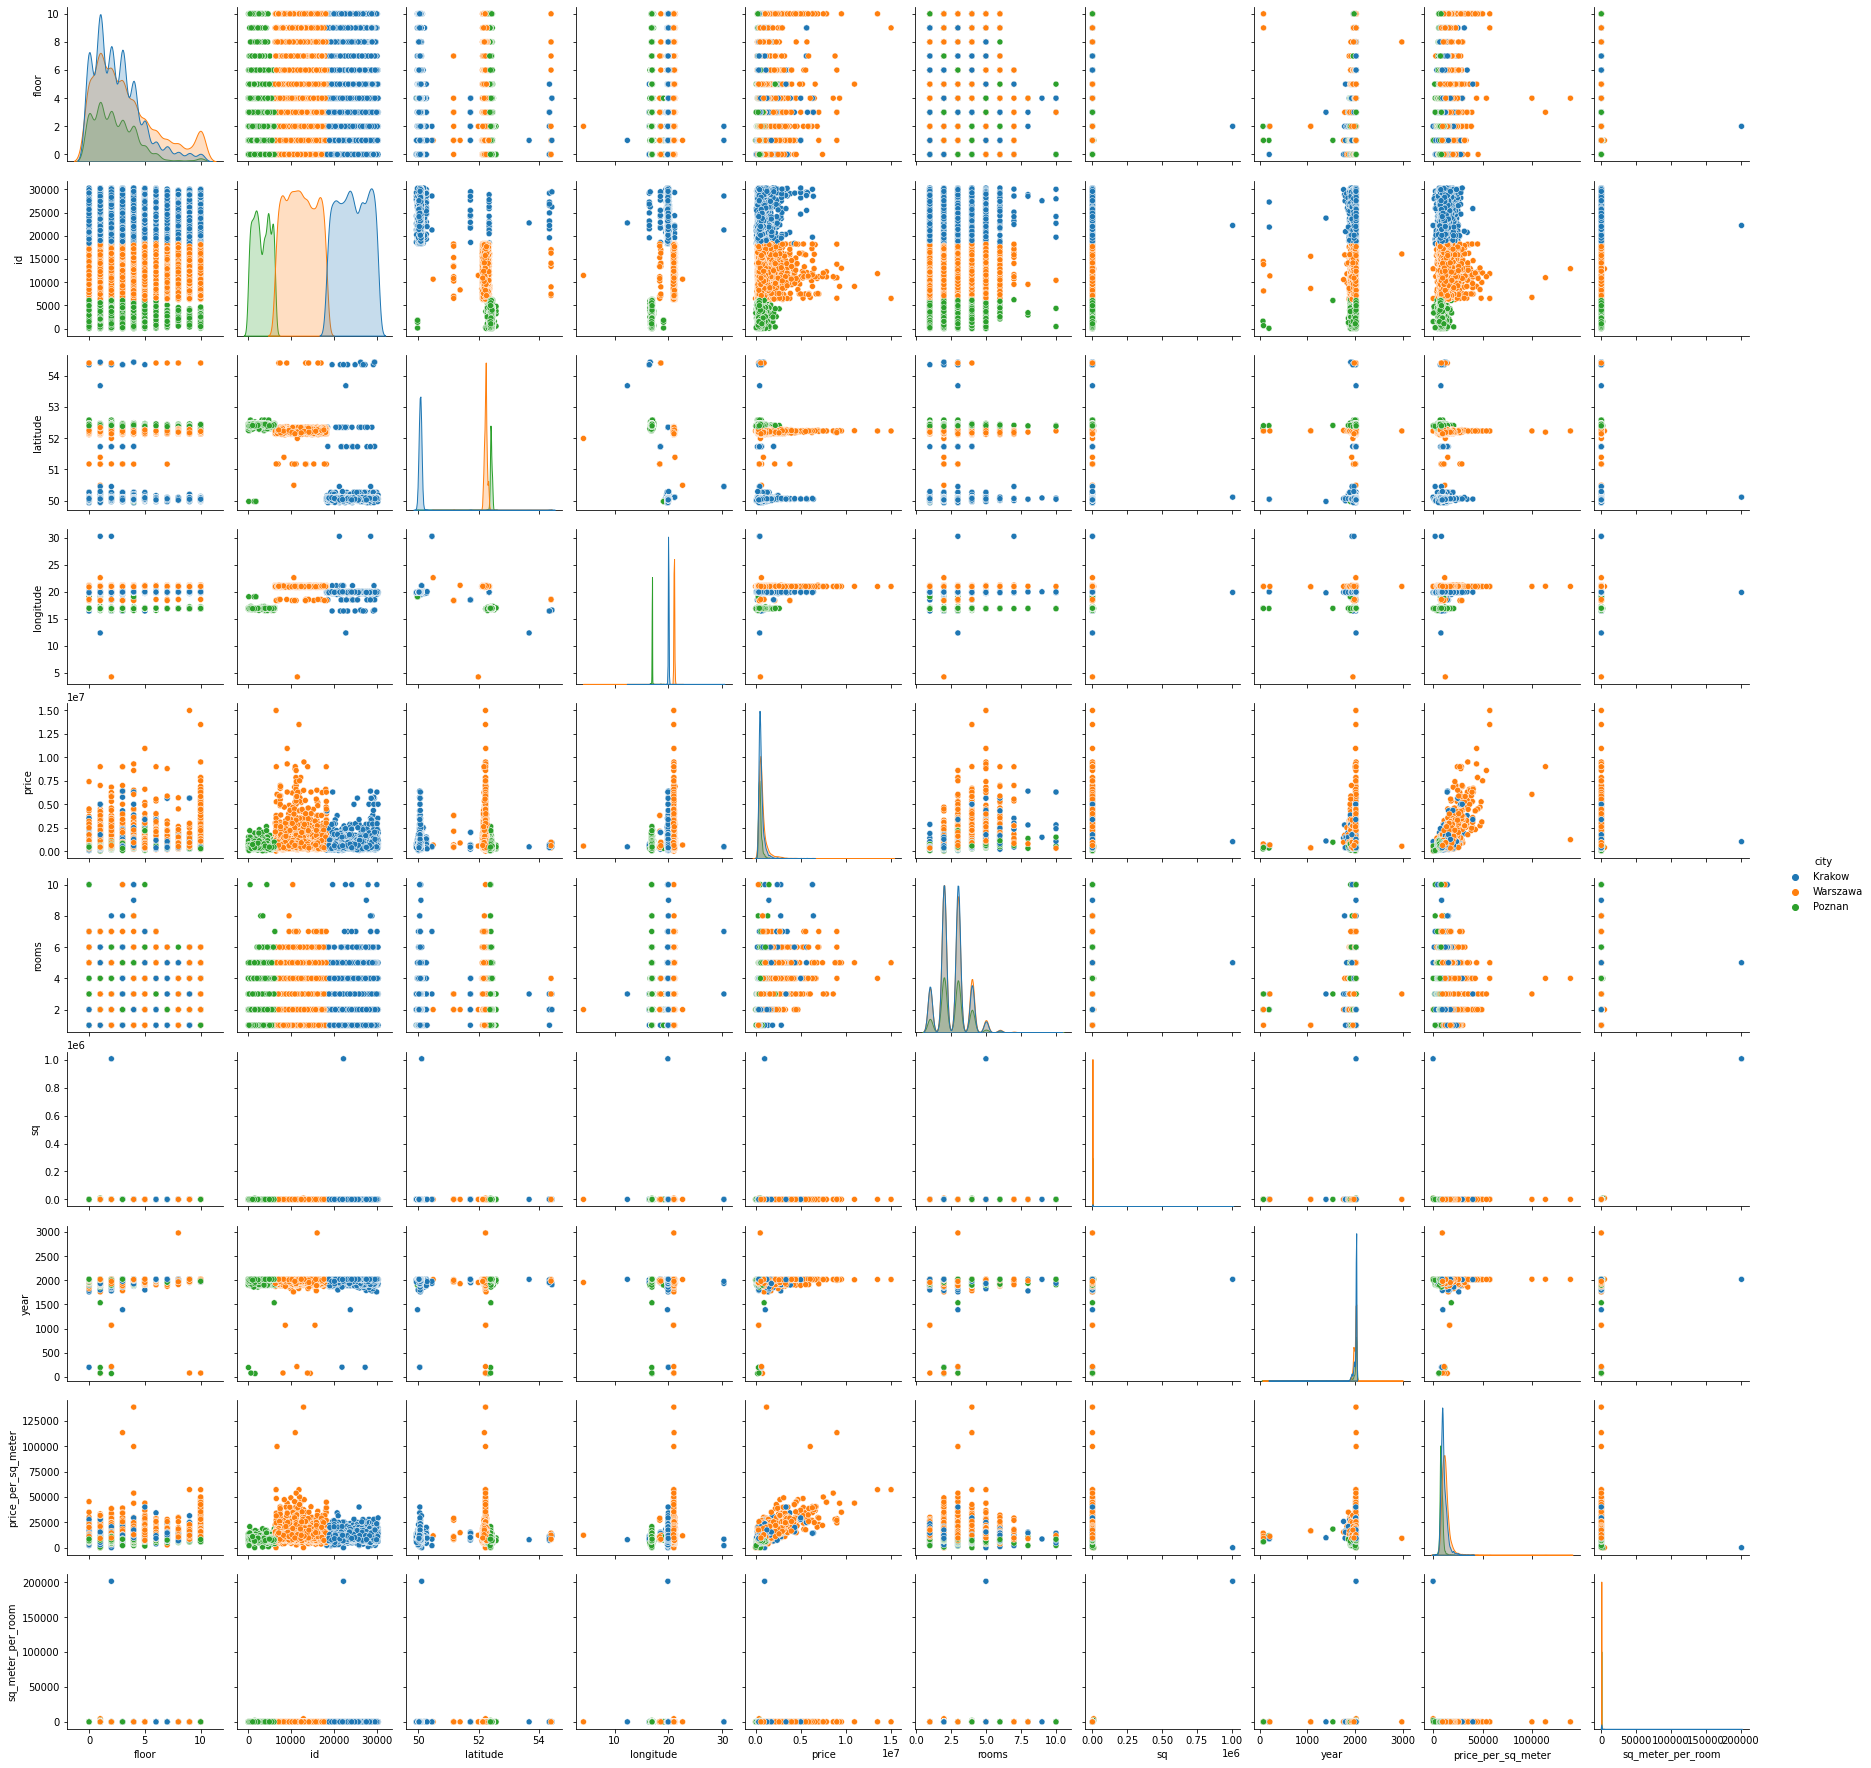

In [13]:
sns.pairplot(data=df, hue='city')

In [14]:
px.scatter(df, x='sq', y='price_per_sq_meter', 
           size='sq', color='price', log_x=True, hover_name='id', size_max=50)

In [15]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        hover_name='id', hover_data=['price', 'sq'], zoom=3)


fig.update_layout(mapbox_style='carto-positron',
                    margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

In [16]:

fig = px.violin(df, x= 'city', y='price_per_sq_meter', box=True, points="all" )
fig.show()

We have clearly few outliers that are messing visualisations and can weigh on the model.
Let's find those outliers and clean them up.

In [17]:
df['sq'].sort_values()

1349           8.80
19580         11.00
6847          11.74
2155          12.00
1749          12.80
            ...    
5734         442.20
13662        442.20
18637       8065.00
10798       9000.00
6198     1007185.00
Name: sq, Length: 23764, dtype: float64

In [18]:
q_low = df['sq'].quantile(0.001)
q_hi  = df['sq'].quantile(0.999)
df = df[(df['sq'] < q_hi) & (df['sq'] > q_low)]

In [19]:
df['sq'].sort_values()

5142      15.00
23007     15.00
16771     15.21
3956      15.25
1894      15.33
          ...  
12968    262.00
11683    262.00
5820     271.00
129      271.60
17766    275.00
Name: sq, Length: 23715, dtype: float64

In [20]:
df['year'].sort_values()

7659       70
1032       75
4513       80
14431      80
10408      81
         ... 
8941     2023
6103     2023
183      2023
13963    2024
4345     2980
Name: year, Length: 23715, dtype: int64

In [21]:
q_low = df['year'].quantile(0.001)
q_hi  = df['year'].quantile(0.999)
df = df[(df['year'] < q_hi) & (df['year'] > q_low)]

In [22]:
df['year'].sort_values()

2583     1841
19334    1850
19175    1850
3001     1854
8278     1860
         ... 
20348    2022
9557     2022
20352    2022
9602     2022
11888    2022
Name: year, Length: 23593, dtype: int64

In [23]:
df['price_per_sq_meter'].sort_values()

10084       100
22783       610
10382      1081
11867      1647
5820       2029
          ...  
21159     53817
15169     57203
12968     57251
21892     99769
20669    113436
Name: price_per_sq_meter, Length: 23593, dtype: int64

In [24]:
q_low = df['price_per_sq_meter'].quantile(0.001)
q_hi  = df['price_per_sq_meter'].quantile(0.999)
df = df[(df['price_per_sq_meter'] < q_hi) & (df['price_per_sq_meter'] > q_low)]

In [25]:
df['price_per_sq_meter'].sort_values()

21913     3155
41        3244
8809      3452
6083      3508
10603     3518
         ...  
14880    39935
8935     39967
10740    40000
14967    40000
23707    40119
Name: price_per_sq_meter, Length: 23545, dtype: int64

In [26]:
df=df[df['longitude'] >= 16.85]
df=df[df['longitude'] <= 21.25]
df=df[df['latitude'] <= 52.47]

Let's see how data looks after cleaning.

In [27]:
px.scatter(df.query("city == 'Warszawa'"), x='sq', y='price_per_sq_meter', 
           size='sq', color='price', log_x=True, hover_name='id', size_max=50)

In [28]:
px.scatter(df.query("city == 'Krakow'"), x='sq', y='price_per_sq_meter', 
           size='sq', color='price', log_x=True, hover_name='id', size_max=50)

In [29]:
px.scatter(df.query("city == 'Poznan'"), x='sq', y='price_per_sq_meter', 
           size='sq', color='price', log_x=True, hover_name='id', size_max=50)

In [30]:
fig = px.violin(df, x= 'city', y='price_per_sq_meter', box=True, points="all", hover_name='id' )
fig.show()

In [31]:
fig = px.violin(df, x= 'rooms', y='price_per_sq_meter',color='city' , box=True, points="all", hover_name='id')
fig.show()

In [32]:
fig = px.violin(df, x= 'floor', y='sq_meter_per_room',color='city' , box=True, points="all", hover_name='id')
fig.show()

In [33]:
fig = px.violin(df, x="year", y="price_per_sq_meter", color='city', hover_name='id')
fig.show()

In [34]:
fig = px.scatter(df, x="price", y="sq", color='city', hover_name='id')
fig.show()

In [35]:
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z= 'price_per_sq_meter' , radius=2,
                        hover_name='id', hover_data=['price', 'sq'], zoom=6)


fig.update_layout(mapbox_style='carto-positron',
                    margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

<AxesSubplot:>

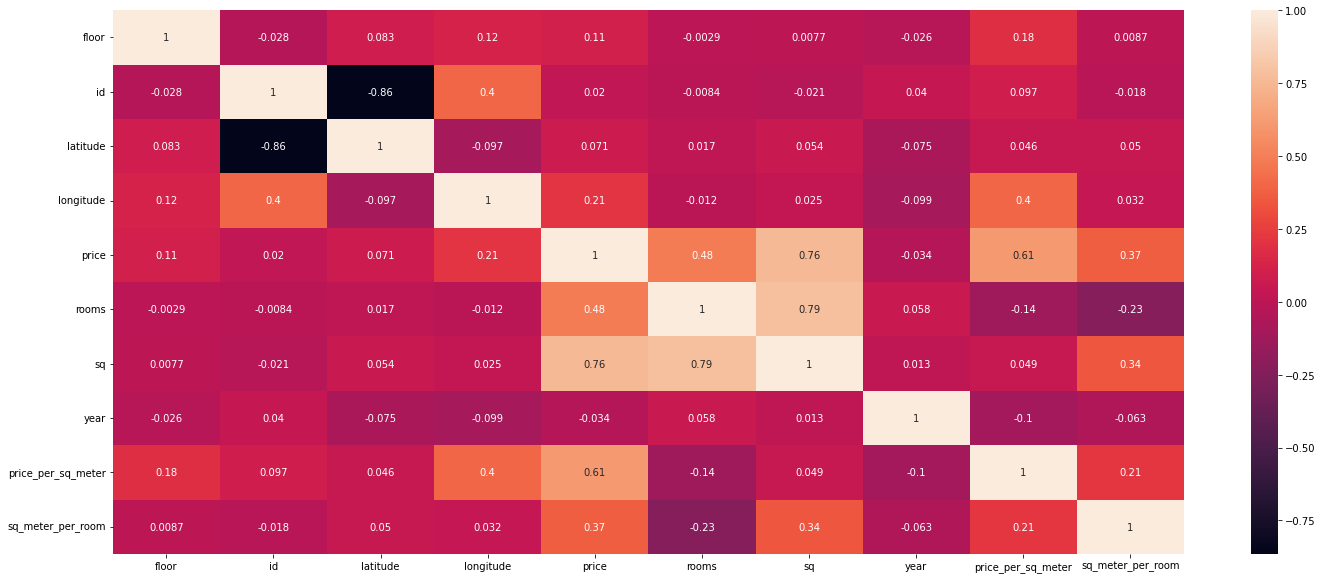

In [36]:
corr = df.corr()
plt.figure(figsize = (24,10))
sns.heatmap(corr,annot = True,cmap = 'rocket')

### Preprocessing and preparing model

In [37]:
df=pd.get_dummies(df, columns = ['city'])

In [38]:
df.head()

address  floor     id   latitude  \
0           Podgórze Zab³ocie Stanis³awa Klimeckiego      2  23918  50.049224   
1                          Praga-Po³udnie Grochowska      3  17828  52.249775   
2                            Krowodrza Czarnowiejska      2  22784  50.066964   
3                                           Grunwald      2   4315  52.404212   
4  Ochota Gotowy budynek. Stan deweloperski. Osta...      1  11770  52.212225   

   longitude    price  rooms      sq  year  price_per_sq_meter  \
0  19.970379   749000      3   74.05  2021               10114   
1  21.106886   240548      1   24.38  2021                9866   
2  19.920025   427000      2   37.00  1970               11540   
3  16.882542  1290000      5  166.00  1935                7771   
4  20.972630   996000      5  105.00  2020                9485   

   sq_meter_per_room  city_Krakow  city_Poznan  city_Warszawa  
0                 24            1            0              0  
1                 24            0            0              1  
2                 18            1            0              0  
3                 33            0            1              0  
4                 21            0            0              1

In [39]:
df=df.drop(['address', 'id', 'price_per_sq_meter', 'sq_meter_per_room'], axis=1)

In [40]:
X=df.loc[:,['floor','latitude','longitude','rooms','sq','year','city_Krakow','city_Poznan','city_Warszawa']]

In [41]:
X

floor   latitude  longitude  rooms      sq  year  city_Krakow  \
0          2  50.049224  19.970379      3   74.05  2021            1   
1          3  52.249775  21.106886      1   24.38  2021            0   
2          2  50.066964  19.920025      2   37.00  1970            1   
3          2  52.404212  16.882542      5  166.00  1935            0   
4          1  52.212225  20.972630      5  105.00  2020            0   
...      ...        ...        ...    ...     ...   ...          ...   
23759      0  52.449649  16.949408      4   77.00  2020            0   
23760      4  52.186109  20.948438      3   71.00  2017            0   
23761      0  52.397345  16.961939      3   50.67  2022            0   
23762      6  50.024231  19.959569      2   38.86  2021            1   
23763      2  52.141039  21.032321      3   63.00  1978            0   

       city_Poznan  city_Warszawa  
0                0              0  
1                0              1  
2                0              0  
3                1              0  
4                0              1  
...            ...            ...  
23759            1              0  
23760            0              1  
23761            1              0  
23762            0              0  
23763            0              1  

[23283 rows x 9 columns]

In [42]:
y = df.iloc[:,-7]

In [43]:
y

0         749000
1         240548
2         427000
3        1290000
4         996000
          ...   
23759     543000
23760     910000
23761     430695
23762     359000
23763     604800
Name: price, Length: 23283, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25,random_state=42)

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

In [47]:
model = ExtraTreesRegressor(n_estimators=75, n_jobs=4, random_state=42)
model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=75, n_jobs=4, random_state=42)

In [48]:
y_pred= model.predict(X_test)

In [49]:
from sklearn.metrics  import r2_score, mean_absolute_error, mean_squared_error 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 64829.70950029405
Mean Squared Error: 32751368072.088017
Root Mean Squared Error: 180973.39050835074
R2 Score: 0.8604501982370079


<Figure size 1152x576 with 0 Axes>

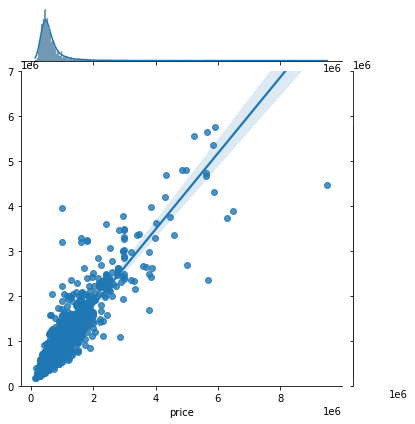

In [50]:
plt.figure(figsize=(16,8))
sns.jointplot(x=y_test, y=y_pred, kind="reg")
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)
plt.show()

## Let's try it on some new data

In [51]:
new_input = [[3, 52.194864, 21.004374, 3 , 75 , 1956, 0 , 0, 1 ]]

In [52]:
new_input = scaler.fit_transform(new_input)

In [53]:
yhat = model.predict(new_input)

In [54]:
print('Prediction: %d' % yhat[0])

Prediction: 566929


Thank you, feedback is highly appreciated! :)

Please upvote if you found this helpful 👍
